## Getting the dataset ready for model training
- Download dataset into tf
- Data cleaning
- Make dataset ready for training


In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 #for rgb channels
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "PlantVillage",
    shuffle = True, 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) #because everything in the dataset is a batch of 32 , 68 * 32 = 2152

68

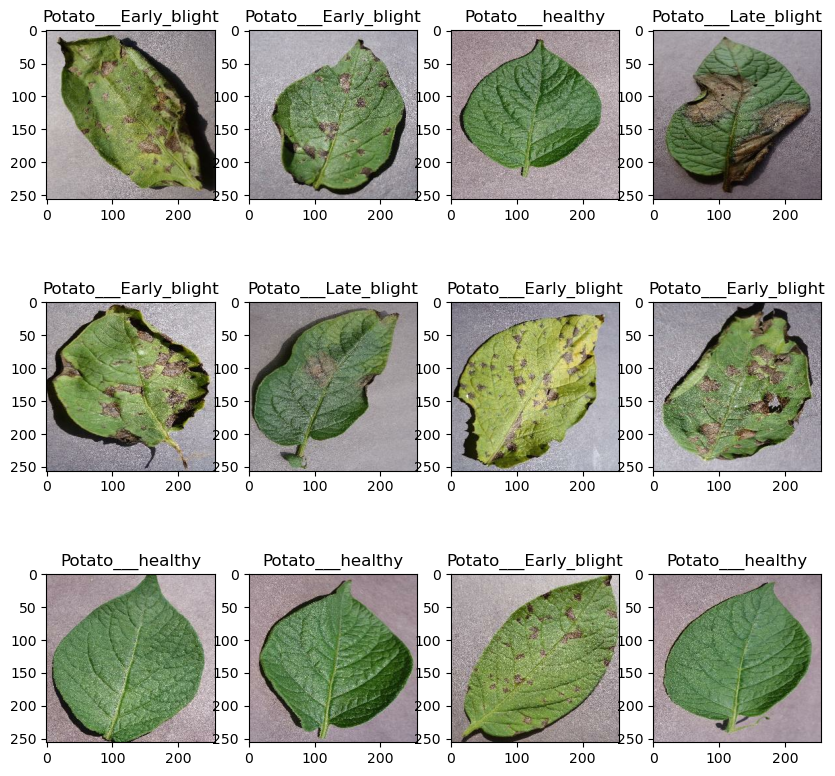

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1) :
    #displaying 12 images from a batch of 32 :
    for i in range(12) :
        ax = plt.subplot(3,4,i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

### Training and Testing split
- 80 % -> training
- 20 % -> 10 % validation (used after every epoch) 10 % test 

In [13]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle = True,shuffle_size = 100) :
    
    if shuffle :
        ds = ds.shuffle(shuffle_size)
        
    train_size = int(0.8 * len(ds))
    train_ds = dataset.take(train_size)
    
    
    test_val_ds = dataset.skip(train_size) 
    
    val_size = int(len(ds) * 0.1)
    val_ds = test_val_ds.take(val_size)
    
    test_ds = test_val_ds.skip(val_size)
    
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
#when we read an image, and we have to read that image again, it stores it in the memory and improves performance

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), #our train/test images are this size, but this is added for prediction, if a user puts an image of some other size.
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
#now we are doing data-augmentation to make our model more robust.

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

